# To do:
1) ✅ Look at the overall trends of each crime type. Is it increasing or not?
2) ✅ Find which crime type appears most often in all cities
3) ✅ Find crime types that exclusively appear in a specific city.
4) Plot the change of overall, each crime tyoe of each city
5) Find if area correlates to any type of crime

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

sns.set()

crimes = pd.read_csv("../data_prep/crimetypes_amount.csv", parse_dates=['month']).iloc[:, 1:]
#df = df.set_index(['location','month'])
crimes.location = crimes.location.apply(lambda x:x[:-7])
crimes.dropna(inplace=True)
crimes.head()

,month,location,Violence and sexual offences,Anti-social behaviour,Public order,Criminal damage and arson,Other theft,Vehicle crime,Burglary,Shoplifting,Drugs,Bicycle theft,Other crime,Robbery,Possession of weapons,Theft from the person
0,2020-06-01,avon-and-somerset,4270,3785.0,1721,1137,776,638,603,513,334,248,226,139,78,56
1,2020-06-01,bedfordshire,1526,1539.0,483,409,295,368,237,174,149,106,113,50,23,26
3,2020-06-01,cambridgeshire,2200,1610.0,559,577,430,303,285,239,200,270,149,36,45,27
4,2020-06-01,cheshire,3297,2517.0,1144,633,381,135,240,327,172,81,150,30,31,13
5,2020-06-01,city-of-london,26,47.0,24,10,22,5,9,48,53,39,15,5,7,13


In [2]:
crimes[crimes['location']=='btp']

,month,location,Violence and sexual offences,Anti-social behaviour,Public order,Criminal damage and arson,Other theft,Vehicle crime,Burglary,Shoplifting,Drugs,Bicycle theft,Other crime,Robbery,Possession of weapons,Theft from the person


In [3]:
crime_types = list(crimes.iloc[0,2:].index)
crime_types.remove('Robbery')
crime_types.remove('Possession of weapons')
print(crime_types)

['Violence and sexual offences', 'Anti-social behaviour', 'Public order', 'Criminal damage and arson', 'Other theft', 'Vehicle crime', 'Burglary', 'Shoplifting', 'Drugs', 'Bicycle theft', 'Other crime', 'Theft from the person']


In [4]:
pop = pd.read_csv('../data/population.csv')
pop = pop.iloc[:,1:-1]
print(pop.shape)
pop.head()

(44, 4)


,force_name,force_area,population2021,population density
0,avon-and-somerset,4777.0,1744500,365.187356
1,bedfordshire,1024.0,704800,688.281250
2,cambridgeshire,3389.0,894300,263.883151
3,cheshire,2346.0,1095100,466.794544
4,city-of-london,2.6,8600,3307.692308


In [5]:
df = pd.merge(
    left=crimes, right=pop,
    how='left',
    left_on='location', right_on='force_name'
)
df.head()

,month,location,Violence and sexual offences,Anti-social behaviour,Public order,Criminal damage and arson,Other theft,Vehicle crime,Burglary,Shoplifting,Drugs,Bicycle theft,Other crime,Robbery,Possession of weapons,Theft from the person,force_name,force_area,population2021,population density
0,2020-06-01,avon-and-somerset,4270,3785.0,1721,1137,776,638,603,513,334,248,226,139,78,56,avon-and-somerset,4777.0,1744500,365.187356
1,2020-06-01,bedfordshire,1526,1539.0,483,409,295,368,237,174,149,106,113,50,23,26,bedfordshire,1024.0,704800,688.281250
2,2020-06-01,cambridgeshire,2200,1610.0,559,577,430,303,285,239,200,270,149,36,45,27,cambridgeshire,3389.0,894300,263.883151
3,2020-06-01,cheshire,3297,2517.0,1144,633,381,135,240,327,172,81,150,30,31,13,cheshire,2346.0,1095100,466.794544
4,2020-06-01,city-of-london,26,47.0,24,10,22,5,9,48,53,39,15,5,7,13,city-of-london,2.6,8600,3307.692308


In [6]:
crime_count = df[crime_types].sum(axis=0)
crime_count = crime_count.to_frame()
crime_count.columns = ['total number of cases']
crime_count.index.names = ['crime type']
crime_count.sort_values('total number of cases', ascending=False)

,total number of cases
crime type,
Violence and sexual offences,4281106.0
Anti-social behaviour,3003491.0
Public order,1041686.0
Criminal damage and arson,1021830.0
Other theft,805174.0
Vehicle crime,695978.0
Shoplifting,529042.0
Burglary,520859.0
Drugs,370495.0


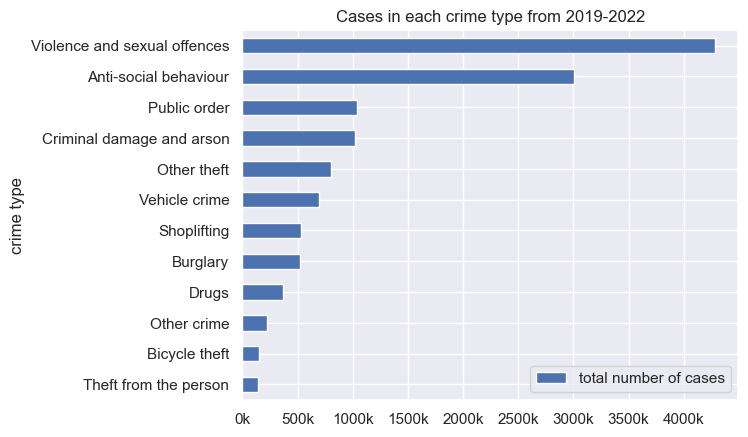

In [7]:
import matplotlib.pyplot as plt

ax = (crime_count/1000).sort_values(by='total number of cases', ascending=True).plot(kind='barh')
ax.xaxis.set_major_formatter(FormatStrFormatter('%dk'))
plt.title('Cases in each crime type from 2019-2022')

plt.show()

In [8]:
pop_dict = pop.set_index('force_name').to_dict()


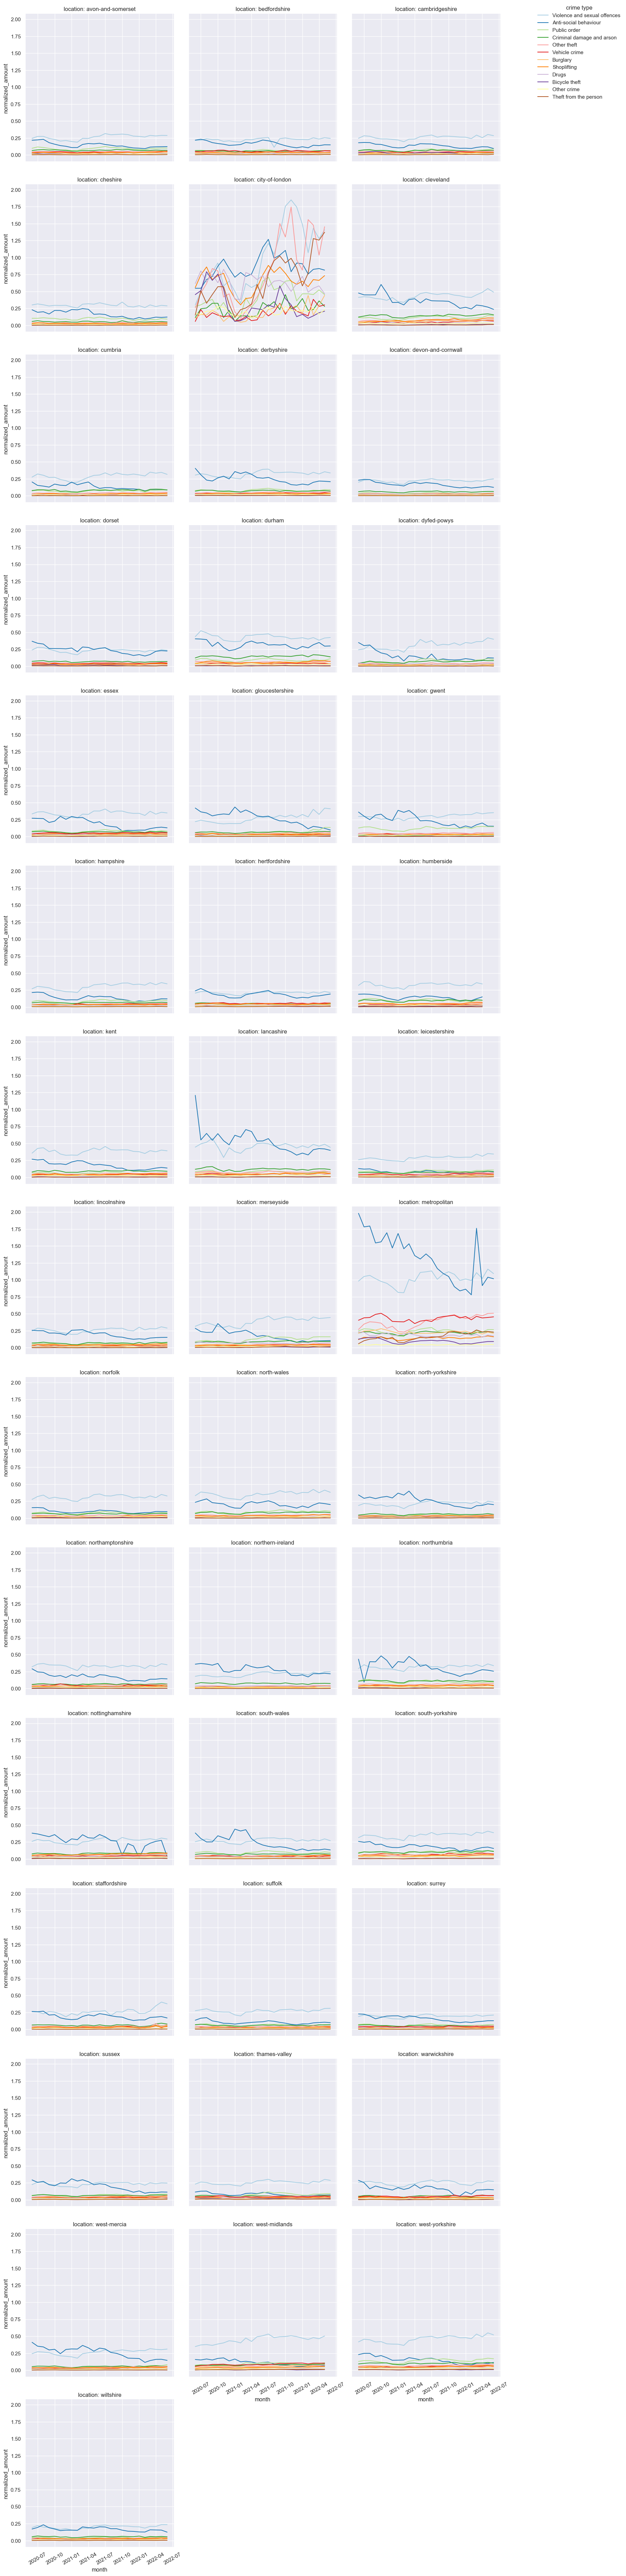

In [9]:
df_location = df[list(crime_types) + ['month','location']]\
                .set_index(['month','location'])\
                .stack().to_frame().reset_index()
df_location.columns = ['month', 'location',  'crime type', 'amount']

# create a population normalized amount of crimes
df_location['normalized_amount'] = df_location[['amount','location']]\
                .apply(
                    lambda x: x['amount']/pop_dict['population2021'][x['location']] * 100, 
                    axis=1
                )

g = sns.relplot(
    data=df_location, x='month', y='normalized_amount', 
    col='location', col_wrap=3,
    kind='line', 
    hue='crime type', palette=sns.color_palette("Paired")
    )
g.set_titles("location: {col_name}")
sns.move_legend(g, "upper left", bbox_to_anchor=(.9, 1))

[plt.setp(ax.get_xticklabels(), rotation=30) for ax in g.axes.flat]
plt.show()

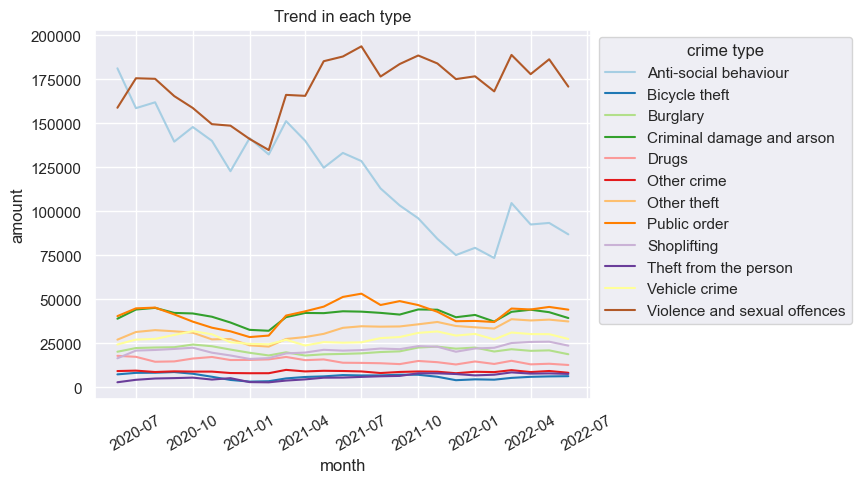

In [10]:
ax = sns.lineplot(
    data=df_location.groupby(['crime type', 'month']).sum().reset_index(),
    x='month',
    y='amount',
    hue='crime type',
    palette=sns.color_palette("Paired")
)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xticks(rotation=30)
plt.title("Trend in each type")
plt.show()


# 2. What situation happens most often

In [11]:
alltime_total_cases_raw = df_location.groupby(by=['crime type','location'])[['amount']].sum()

In [12]:
idx = alltime_total_cases_raw['amount'].argmax()

print(alltime_total_cases_raw.iloc[idx])
# this appears most often

amount    665215.0
Name: (Anti-social behaviour, metropolitan), dtype: float64


i.e. The situation that happens most often : 'Anti-social behaviour' in 'metropolitan-street' which happend 665215 times throughout past 3 years

# 3. Any exclusive?

In [13]:
exclusive = df_location.groupby(by=['location', 'crime type'])[['amount']].agg('sum')
by_loc = exclusive.groupby('location').sum().to_dict()

exclusive['proportion'] = exclusive.apply(lambda x: x/by_loc['amount'][x.name[0]], axis=1)

exclusive

amount  proportion
location          crime type                                       
avon-and-somerset Anti-social behaviour         62946.0    0.187154
                  Bicycle theft                  5675.0    0.016873
                  Burglary                      13873.0    0.041248
                  Criminal damage and arson     30383.0    0.090336
                  Drugs                          5863.0    0.017432
...                                                 ...         ...
wiltshire         Public order                   7808.0    0.069965
                  Shoplifting                    5304.0    0.047528
                  Theft from the person           436.0    0.003907
                  Vehicle crime                  4244.0    0.038029
                  Violence and sexual offences  37099.0    0.332434

[516 rows x 2 columns]

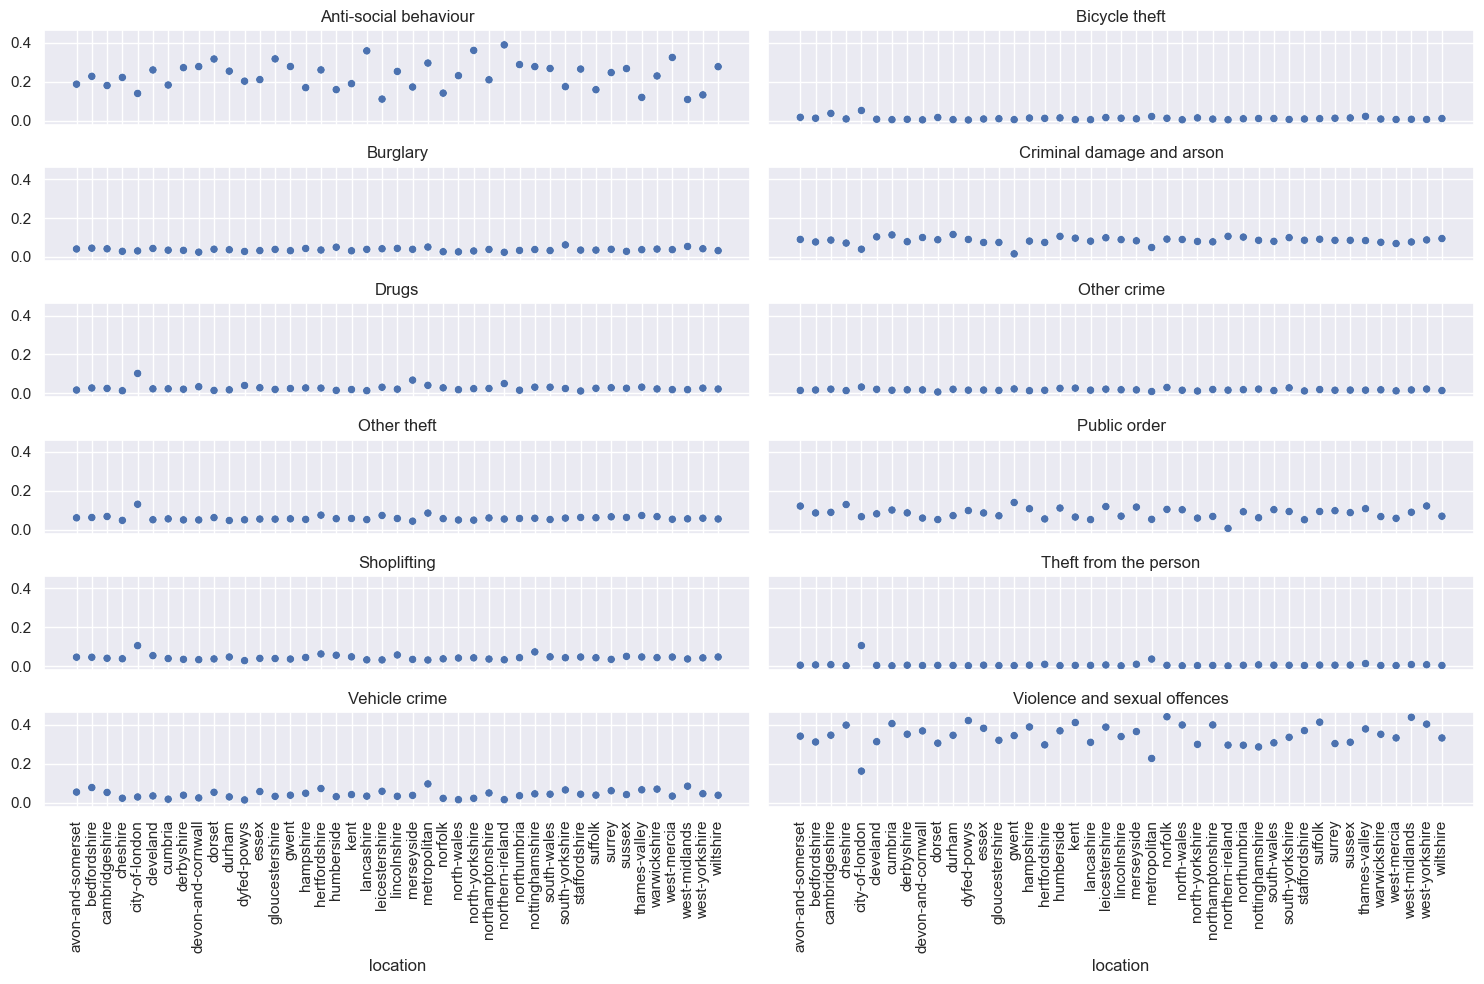

In [14]:
ncols = 2
nrows = len(exclusive.index.levels[1])//ncols
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 10), sharex=True, sharey=True)

for i, crime in enumerate(exclusive.index.levels[1]):
    sns.scatterplot(
        data=exclusive.xs(crime, level='crime type')[['proportion']], 
        ax=axes[i//ncols][i%ncols], 
        legend=False
    )
    axes[i//ncols][i%ncols].set_title(crime)

[plt.setp(ax.get_xticklabels(), rotation=90) for ax in fig.axes]
plt.tight_layout()
plt.show()

# 4) Change over time

# Calculate safe index

In [15]:
crime_types

['Violence and sexual offences',
 'Anti-social behaviour',
 'Public order',
 'Criminal damage and arson',
 'Other theft',
 'Vehicle crime',
 'Burglary',
 'Shoplifting',
 'Drugs',
 'Bicycle theft',
 'Other crime',
 'Theft from the person']

In [8]:
weight = {'Anti-social behaviour' : 0.1,
'Bicycle theft' : 3,
'Burglary' : 12,
'Criminal damage and arson' : 20,
'Drugs' : 10,
'Public order' : 0.5,
'Shoplifting' : 2,
'Theft from the person' : 7,
'Vehicle crime' : 5,
'Violence and sexual offences' : 20,
'Other theft' : 5,
'Other crime' : 5}

In [9]:
x = df[crime_types].loc[:, weight.keys()].apply(lambda x:x/df['population density']).values @ np.array(list(weight.values()))

In [10]:
df['safe_index'] = x

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x = scaler.fit_transform(x.reshape(-1,1))

In [13]:
x

array([[0.34140545],
       [0.0665784 ],
       [0.24382574],
       ...,
       [0.61000145],
       [0.28171631],
       [0.22496251]])

In [14]:
df['safe_index_norm'] = x

In [15]:
df.to_csv('df_preprocessed.csv', index=False)

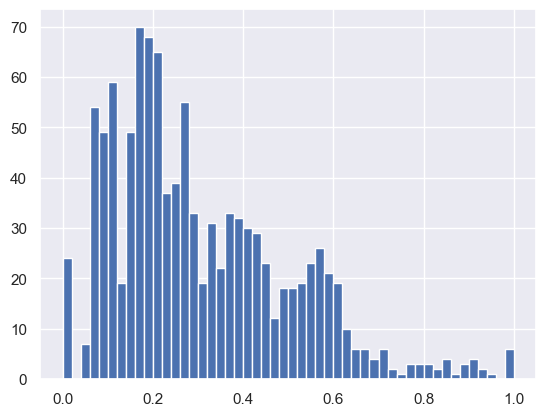

In [24]:
plt.hist(x=x.ravel(), bins=50);

In [26]:
df.head()

,month,location,Violence and sexual offences,Anti-social behaviour,Public order,Criminal damage and arson,Other theft,Vehicle crime,Burglary,Shoplifting,...,Bicycle theft,Other crime,Robbery,Possession of weapons,Theft from the person,force_name,force_area,population2021,population density,safe_index
0,2020-06-01,avon-and-somerset,4270,3785.0,1721,1137,776,638,603,513,...,248,226,139,78,56,avon-and-somerset,4777.0,1744500,365.187356,356.849704
1,2020-06-01,bedfordshire,1526,1539.0,483,409,295,368,237,174,...,106,113,50,23,26,bedfordshire,1024.0,704800,688.281250,69.967619
2,2020-06-01,cambridgeshire,2200,1610.0,559,577,430,303,285,239,...,270,149,36,45,27,cambridgeshire,3389.0,894300,263.883151,254.989755
3,2020-06-01,cheshire,3297,2517.0,1144,633,381,135,240,327,...,81,150,30,31,13,cheshire,2346.0,1095100,466.794544,189.251784
4,2020-06-01,city-of-london,26,47.0,24,10,22,5,9,48,...,39,15,5,7,13,city-of-london,2.6,8600,3307.692308,0.571002


In [31]:
df['next month safe index'] = df['safe_index'].shift(periods=-1)

In [32]:
df

,month,location,Violence and sexual offences,Anti-social behaviour,Public order,Criminal damage and arson,Other theft,Vehicle crime,Burglary,Shoplifting,...,Other crime,Robbery,Possession of weapons,Theft from the person,force_name,force_area,population2021,population density,safe_index,next month safe index
0,2020-06-01,avon-and-somerset,4270,3785.0,1721,1137,776,638,603,513,...,226,139,78,56,avon-and-somerset,4777.0,1744500,365.187356,356.849704,69.967619
1,2020-06-01,bedfordshire,1526,1539.0,483,409,295,368,237,174,...,113,50,23,26,bedfordshire,1024.0,704800,688.281250,69.967619,254.989755
2,2020-06-01,cambridgeshire,2200,1610.0,559,577,430,303,285,239,...,149,36,45,27,cambridgeshire,3389.0,894300,263.883151,254.989755,189.251784
3,2020-06-01,cheshire,3297,2517.0,1144,633,381,135,240,327,...,150,30,31,13,cheshire,2346.0,1095100,466.794544,189.251784,0.571002
4,2020-06-01,city-of-london,26,47.0,24,10,22,5,9,48,...,15,5,7,13,city-of-london,2.6,8600,3307.692308,0.571002,75.021707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2022-06-01,thames-valley,7198,1776.0,2279,1602,1411,1105,562,895,...,263,105,111,262,thames-valley,5742.0,2515100,438.018112,470.752451,155.049414
1066,2022-06-01,warwickshire,1618,879.0,321,347,343,378,163,165,...,64,39,53,22,warwickshire,1975.0,596800,302.177215,155.049414,637.227429
1067,2022-06-01,west-mercia,4038,1878.0,1052,755,747,387,426,643,...,166,56,82,42,west-mercia,7428.0,1299900,175.000000,637.227429,294.542361
1068,2022-06-01,west-yorkshire,12233,2665.0,3957,2436,1964,1429,1127,1502,...,608,253,219,300,west-yorkshire,2029.0,2351600,1158.994579,294.542361,235.299103
